Importaciones

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Descarga de imagenes

In [3]:
# Cargar el conjunto de datos MNIST
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Ver formas de los conjuntos de datos
print(f"Train Full: {x_train_full.shape}, Test: {x_test.shape}")

Train Full: (60000, 28, 28), Test: (10000, 28, 28)


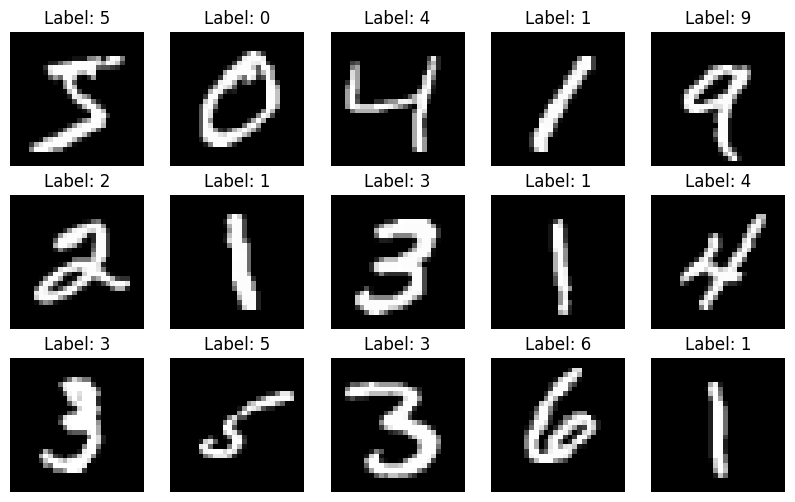

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_full[i], cmap='gray')
    ax.set_title(f"Label: {y_train_full[i]}")
    ax.axis("off")
plt.show()

- Normalización:
Dividimos los valores de los píxeles entre 255 para escalar al rango [0,1].

In [5]:
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0  # Normalizar

- Añadir una Dimensión de Canal: Las imágenes están en escala de grises, por lo que añadimos una dimensión extra (28, 28, 1).

In [6]:
x_train_full = x_train_full[..., np.newaxis]
x_test = x_test[..., np.newaxis]

- Dividir en Entrenamiento (70%) y Validación (15%)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.15, stratify=y_train_full, random_state=42)


- Generador de aumentación de datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Aumentación de datos para el conjunto de entrenamiento
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotación aleatoria de la imagen
    width_shift_range=0.2,  # Traslación horizontal
    height_shift_range=0.2,  # Traslación vertical
    shear_range=0.2,  # Corte aleatorio
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=False, 
    fill_mode='nearest'  # Método de rellenado de píxeles
)

In [ ]:
print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

- Creación del modelo

In [9]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = create_model()
# Ajustar el generador a las imágenes de entrenamiento.
datagen.fit(x_train) # Metemos las imagenes de entrenamiento para aplicar la aumentación.

# Entrenar el modelo usando el generador de aumentación de datos.
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10)

c:\Users\Eduardo\Desktop\EntonoTensorflow\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\Eduardo\Desktop\EntonoTensorflow\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5615 - loss: 1.2681
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8640 - loss: 0.4369
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9048 - loss: 0.3100
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9246 - loss: 0.2487
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9328 - loss: 0.2224
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9413 - loss: 0.1957
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9431 - loss: 0.1901
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9478 - loss: 0.1770
Epoch 9/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9480 - loss: 0.1766
Epoch 10/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9518 - loss: 0.1626


- Cargar y Preprocesar la imagen

In [11]:
# Función para cargar y preprocesar la imagen con inversión de colores
def preprocess_image(image_path):
    # Cargar la imagen en escala de grises (debe ser un número manuscrito)
    img = Image.open(image_path).convert('L')  # 'L' para convertir a escala de grises
    
    # Invertir los colores (el fondo blanco se convierte en negro y el número negro en blanco)
    img_inverted = Image.eval(img, lambda x: 255 - x)
    
    # Redimensionar la imagen a 28x28 (tamaño del dataset MNIST)
    img_resized = img_inverted.resize((28, 28))
    
    # Convertir la imagen a un array de numpy
    img_array = np.array(img_resized)
    
    # Normalizar la imagen (dividir por 255 para que esté entre 0 y 1)
    img_normalized = img_array / 255.0
    
    # Añadir una dimensión extra para que sea compatible con la entrada del modelo (28, 28, 1)
    img_expanded = np.expand_dims(img_normalized, axis=-1)
    
    # Añadir la dimensión para el batch (1, 28, 28, 1)
    img_batch = np.expand_dims(img_expanded, axis=0)
    
    return img_batch

# Cargar y preprocesar la imagen desde la ruta especificada
image_path = "Imagenes/imagen.png"
preprocessed_image = preprocess_image(image_path)


- Función para realizar la predicción

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


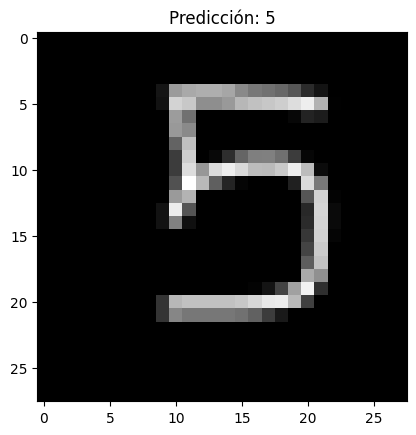

El modelo predijo el número: 5


In [12]:
# Función para predecir el número en la imagen
def predict_number(model, image_path):
    # Preprocesar la imagen
    img_batch = preprocess_image(image_path)
    
    # Realizar la predicción
    prediction = model.predict(img_batch)
    
    # Obtener la clase con la mayor probabilidad (el número que predice)
    predicted_class = np.argmax(prediction)
    
    # Mostrar la imagen y el número predicho
    plt.imshow(img_batch[0, ..., 0], cmap="gray")
    plt.title(f"Predicción: {predicted_class}")
    plt.show()
    
    return predicted_class

# Testear la imagen
image_path = "Imagenes/imagen.png"  # Cambia esto al camino de tu imagen
predicted_number = predict_number(model, image_path)
print(f"El modelo predijo el número: {predicted_number}")

- Predecir varios numeros

In [22]:
from PIL import ImageOps
def preprocess_digit_image(digit_img):
    digit_img = ImageOps.invert(digit_img.convert('L'))
    digit_img = digit_img.resize((28, 28))
    img_array = np.array(digit_img) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_multiple_digits(model, image_path, num_digits):
    image = Image.open(image_path).convert('L')
    width, height = image.size
    digit_width = width // num_digits

    predictions = []

    # Aumentamos el tamaño de la figura: ancho depende de num_digits
    plt.figure(figsize=(num_digits * 3, 5))  # MÁS grande que antes

    for i in range(num_digits):
        left = i * digit_width
        right = (i + 1) * digit_width
        digit_img = image.crop((left, 0, right, height))
        img_input = preprocess_digit_image(digit_img)

        prediction = model.predict(img_input)
        predicted_class = np.argmax(prediction)
        predictions.append(predicted_class)

        # Mostrar con más tamaño
        ax = plt.subplot(1, num_digits, i + 1)
        ax.imshow(img_input[0, ..., 0], cmap='gray')
        ax.set_title(f"{predicted_class}", fontsize=20)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


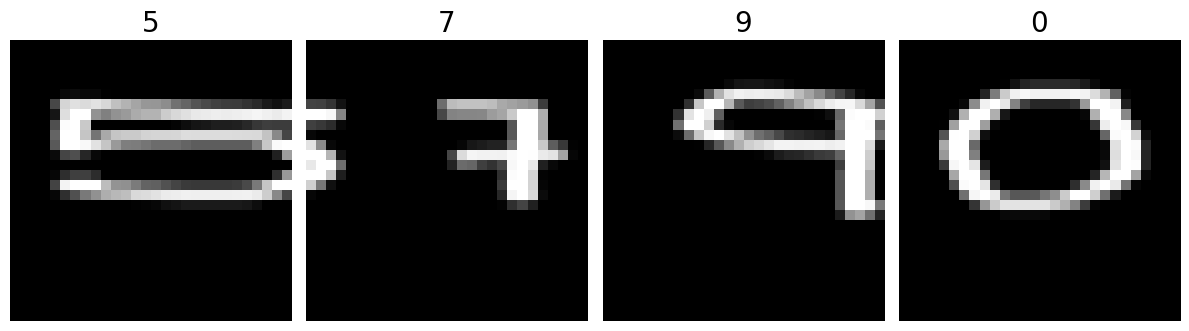

Números predichos: [np.int64(5), np.int64(7), np.int64(9), np.int64(0)]


In [24]:
image_path = "Imagenes/imagenMultiple.png"  # tu imagen con varios números seguidos
num_digits = 4  # Por ejemplo: si son 4 dígitos como 1, 2, 9, 4

resultados = predict_multiple_digits(model, image_path, num_digits)
print("Números predichos:", resultados)


- Guardar nuetro modelo en keras

In [15]:
model.save("modelo.keras")
